# Making predictions with simple linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

#Import the data box office revenues
#Since we will be making predictions, let's load 10 observations
d = {"y":[23,12,36,27,45,70,55,8,62,28],"x":[29,49,89,110,210,190,153,20,122,41]}
data = pd.DataFrame(data = d)

#To make predictions, we have to make a split between a train and a test set
#Use the train_test_split function from sklearn to do so
from sklearn.model_selection import train_test_split

#Make a train and test split (70/30)
train, test = train_test_split(data, test_size=0.30, random_state=42)

#Build a statsmodels SLR
#Add the intercept
train = sm.add_constant(train)
test = sm.add_constant(test)

#Fit an OLS model and make a prediction
linreg = sm.OLS(train[['y']],train[['const','x']]).fit()
pred_stats = linreg.predict(test[['const','x']])
print(pred_stats)

8    36.895146
1    23.789109
5    49.103509
dtype: float64


In [4]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

print('MAE: '+str(mae(test[['y']],pred_stats)))
print('RMSE: '+str(np.sqrt(mse(test[['y']],pred_stats))))
print('R-squared test: '+str(r2(test[['y']],pred_stats)))
print('R-squared train: '+str(linreg.rsquared))

MAE: 19.263484892178546
RMSE: 20.049107665022714
R-squared test: 0.38972664246405997
R-squared train: 0.6787794571092658


Now, let's make predictions wih the sklearn package. Since it is focused on predicting, it does not have a nice output summary for simple linear regression. So, if you are interested in interpreting the model, statsmodels might be more suitable. However, for true predictive purposes, sklearn might be more convenient.

In [5]:
from sklearn.linear_model import LinearRegression

#Since sklearn automatically adds the intercept, let's make the train/test splits again
train, test = train_test_split(data,test_size=0.3, random_state=42)

#Initiate the linear regression model
lm = LinearRegression()

#Fit the model
lm.fit(train[['x']],train[['y']])

#We can have a look at intercept and the coefficient
print('intercept: ' + str(lm.intercept_))
print('x : ' + str(lm.coef_))

#Make predictions
pred_sk = lm.predict(test[['x']])

#Check whether the results of statsmodels and sklearn are the same
pred_sk.all()==pred_stats.all()

intercept: [14.99190618]
x : [[0.17953475]]


True

In [6]:
#Evaluate performance
print('MAE: '+str(mae(test[['y']],pred_sk)))
print('RMSE1: '+str(np.sqrt(mse(test[['y']],pred_sk))))
print('R-squared test: '+str(r2(test[['y']],pred_sk)))
print('R-squared train: '+str(lm.score(train[['x']],train[['y']])))

MAE: 19.263484892178543
RMSE1: 20.04910766502271
R-squared test: 0.3897266424640602
R-squared train: 0.6787794571092659


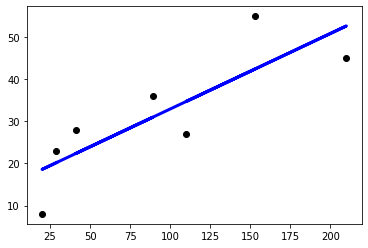

In [7]:
#Make a plot of the training set and regression line
plt.scatter(train[['x']], train[['y']], color='black')

regression_line = lm.intercept_ + lm.coef_*train[['x']]
plt.plot(train[['x']], regression_line, color = 'blue', linewidth = 3)

plt.show()

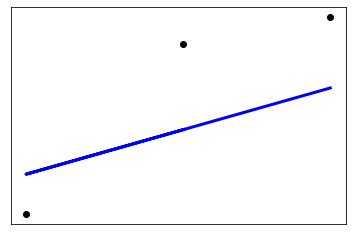

In [8]:
#Make plot of the predictions
plt.scatter(test[['x']],test[['y']], color='black')
plt.plot(test[['x']], pred_sk, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()